In [28]:
!pip install -U imbalanced-learn

# Read Data

In [29]:
#read data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/hcv_classification.csv', index_col=False)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


In [30]:
X = df.drop(['Activity'], axis =1)
y = df['Activity']

## Class Distribution

In [31]:
y.value_counts()

active      412
inactive    166
Name: Activity, dtype: int64

### Approach 1

<Axes: ylabel='Activity'>

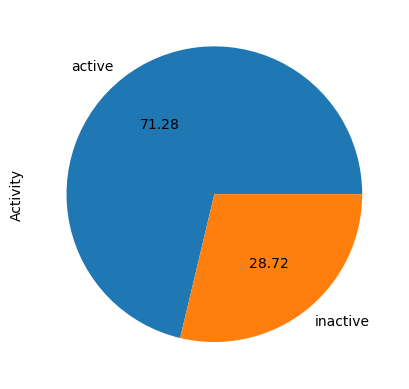

In [32]:
y.value_counts().plot.pie(autopct='%.2f')

### Approach 2 using matplotlib

([<matplotlib.patches.Wedge at 0x253a56bfa00>,
 [Text(-0.6818247054992795, 0.8632004813314349, ''),
  Text(0.6818247054992798, -0.8632004813314348, '')],
 [Text(-0.3719043848177888, 0.4708366261807826, '71.28'),
  Text(0.3719043848177889, -0.47083662618078254, '28.72')])

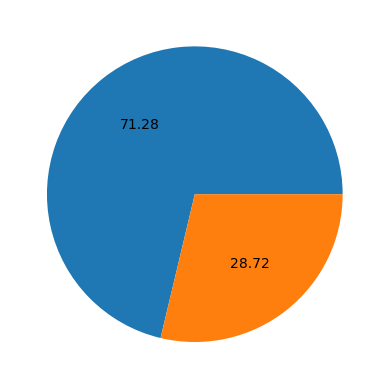

In [35]:
import matplotlib.pyplot as plt
fig1, ax1= plt.subplots()
ax1.pie(y.value_counts(), autopct = '%.2f')

# Random under-sampling

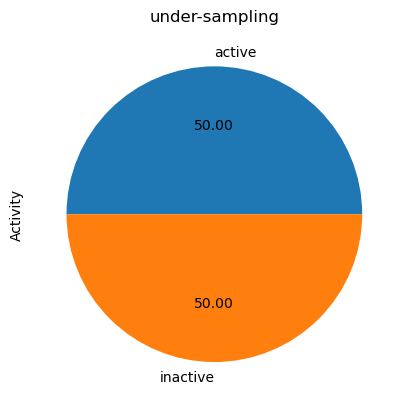

In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy= 1)  #Numerical value
#rus = RandomUnderSampler(sampling_strategy= 'not minority')  #string

x_res, y_res= rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title('under-sampling')




### new distribution 

In [41]:
y_res.value_counts()

active      166
inactive    166
Name: Activity, dtype: int64

# Random over-sampling

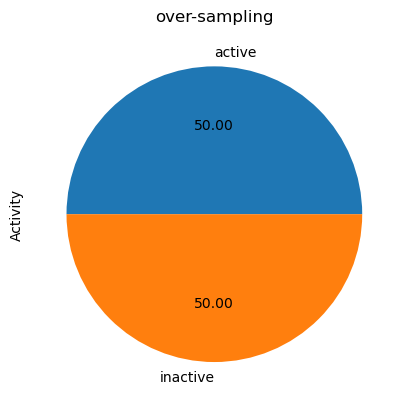

In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy= 'not majority')#string
#ros = RandomOverSampler(sampling_strategy= 1) #Numerical value

x_res, y_res= ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title('over-sampling')

In [44]:
y_res.value_counts()

active      412
inactive    412
Name: Activity, dtype: int64